# <font color='LightBlue'> **Transportation Model**</font>

<font color='Silver'>
Kevin Schaaf ()
Haron Malash ()
Sanjhana Bhusal ()
Martijn Messanella ()
Lisa Pahladsingh ()
</font>

In [7]:
from Simulate import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import pandas as pd

plt.style.use('default')

## <font color='LightGreen'> ***Capacity***</font>
Kevin

In [8]:
def vary_capacity_experiment(num_commuters, islands, capacity, metrics_to_plot, ferry_base_price):
    '''
    This function executes the capacity experiment. 
    args:
        num_commuters:   The number of agents in the model
        islands:         The names of the islands included in the model
        capacities:      A list or array of integers, with the lowest integer the number of agents
        metrics_to_plot: A list of all the metrics you want to plot; 
                         This should be a list of strings with the names of the metrics.
                         Also, this variable might need adjustment for different number of islands
    Output:
        Plot of the percentage of ferry users for this settings of the experiment. 
    '''
    simulation = Simulation(
        num_commuters=num_commuters,
        num_days=100,
        islands=islands,
        capacity=capacity,
        ferry_base_price=ferry_base_price,
        ferry_base_time=40,
        speedboat_base_price=6,
        speedboat_base_time=10,
    )

    simulation.run()

    # Plot specific results
    metrics_to_plot = [
        'Ferry_Island_A_Island_B_users',
        'Ferry_Island_B_Island_A_users', 
        'Speedboat_Island_A_Island_B_users', 
        'Speedboat_Island_B_Island_A_users'
    ]

    return simulation.return_percentage_ferry_users(metrics_to_plot)

In [9]:
islands = ["Island_A", "Island_B"]
num_commuters = 1000
prices = [1]#np.arange(1, 11, 1)
capacities = [1]#np.arange(200, 2200, 200)
runs = 1
ferry_base_price = 1

num_days = 100
metrics_to_plot = [
    'Ferry_Island_A_Island_B_users',
    'Ferry_Island_B_Island_A_users', 
    'Speedboat_Island_A_Island_B_users', 
    'Speedboat_Island_B_Island_A_users'
]

percentages_ferry_users = np.zeros((len(capacities), len(prices), num_days, runs))
mean = np.zeros((len(capacities), len(prices), num_days))
CI = np.zeros((len(capacities), len(prices), num_days, 2))

mean_mean = np.zeros((len(capacities), len(prices)))
CI_mean = np.zeros((len(capacities), len(prices), 2))
capacity = 1000

for price_ix, ferry_base_price in enumerate(prices):
    for capacity_ix, capacity in enumerate(capacities):
        for i in range(runs):
            percentages_ferry_users[capacity_ix, price_ix, :, i] = vary_capacity_experiment(num_commuters, islands, capacity, metrics_to_plot, ferry_base_price)

        mean[capacity_ix, price_ix] = np.mean(percentages_ferry_users[capacity_ix, price_ix], axis=1)
        CI[capacity_ix, price_ix] = np.percentile(percentages_ferry_users[capacity_ix, price_ix], [2.5, 97.5], axis=1).T

        mean_mean[capacity_ix, price_ix] = np.mean(mean[capacity_ix, price_ix, -10:])
        CI_mean[capacity_ix, price_ix] = np.percentile(mean[capacity_ix, price_ix, -10:], [2.5, 97.5])


In [4]:
df_percentages = pd.DataFrame(percentages_ferry_users.reshape(len(capacities)*len(prices)*num_days*runs))
df_mean = pd.DataFrame(mean.reshape(len(capacities)*len(prices)*num_days))
df_CI = pd.DataFrame(CI.reshape(len(capacities)*len(prices)*num_days*2))
df_mean_mean = pd.DataFrame(mean_mean.reshape(len(capacities)*len(prices)))
df_CI_mean = pd.DataFrame(CI_mean.reshape(len(capacities)*len(prices)*2))

# Save DataFrames to CSV
df_percentages.to_csv('Data/percentages_ferry_users.csv', index=False)
df_mean.to_csv('Data/mean.csv', index=False)
df_CI.to_csv('Data/CI.csv', index=False)
df_mean_mean.to_csv('Data/mean_mean.csv', index=False)
df_CI_mean.to_csv('Data/CI_mean.csv', index=False)

In [8]:
def save_Back_up_Data():
    df_percentages.to_csv('Back_up_Data/percentages_ferry_users.csv', index=False)
    df_mean.to_csv('Back_up_Data/mean.csv', index=False)
    df_CI.to_csv('Back_up_Data/CI.csv', index=False)
    df_mean_mean.to_csv('Back_up_Data/mean_mean.csv', index=False)
    df_CI_mean.to_csv('Back_up_Data/CI_mean.csv', index=False)

# # If the run was a quality run, uncomment the next line 
# save_Back_up_Data()

In [5]:
prices = np.arange(1, 11, 1)
capacities = np.arange(200, 2200, 200)

df_percentages = pd.read_csv('Data2/percentages_ferry_users.csv')
df_mean = pd.read_csv('Data2/mean.csv')
df_CI = pd.read_csv('Data2/CI.csv')
df_mean_mean = pd.read_csv('Data2/mean_mean.csv')
df_CI_mean = pd.read_csv('Data2/CI_mean.csv')

# Get the original shapes
num_days = 100
num_prices = len(prices)
num_capacities = len(capacities)
runs = 15

# Reshape the data to their original shapes
percentages_ferry_users = df_percentages.values.reshape(num_capacities, num_prices, num_days, runs)
mean = df_mean.values.reshape(num_capacities, num_prices, num_days)
CI = df_CI.values.reshape(num_capacities, num_prices, num_days, 2)
mean_mean = df_mean_mean.values.reshape(num_capacities, num_prices)
CI_mean = df_CI_mean.values.reshape(num_capacities, num_prices, 2)

AttributeError: Text.set() got an unexpected keyword argument 'fontwight'

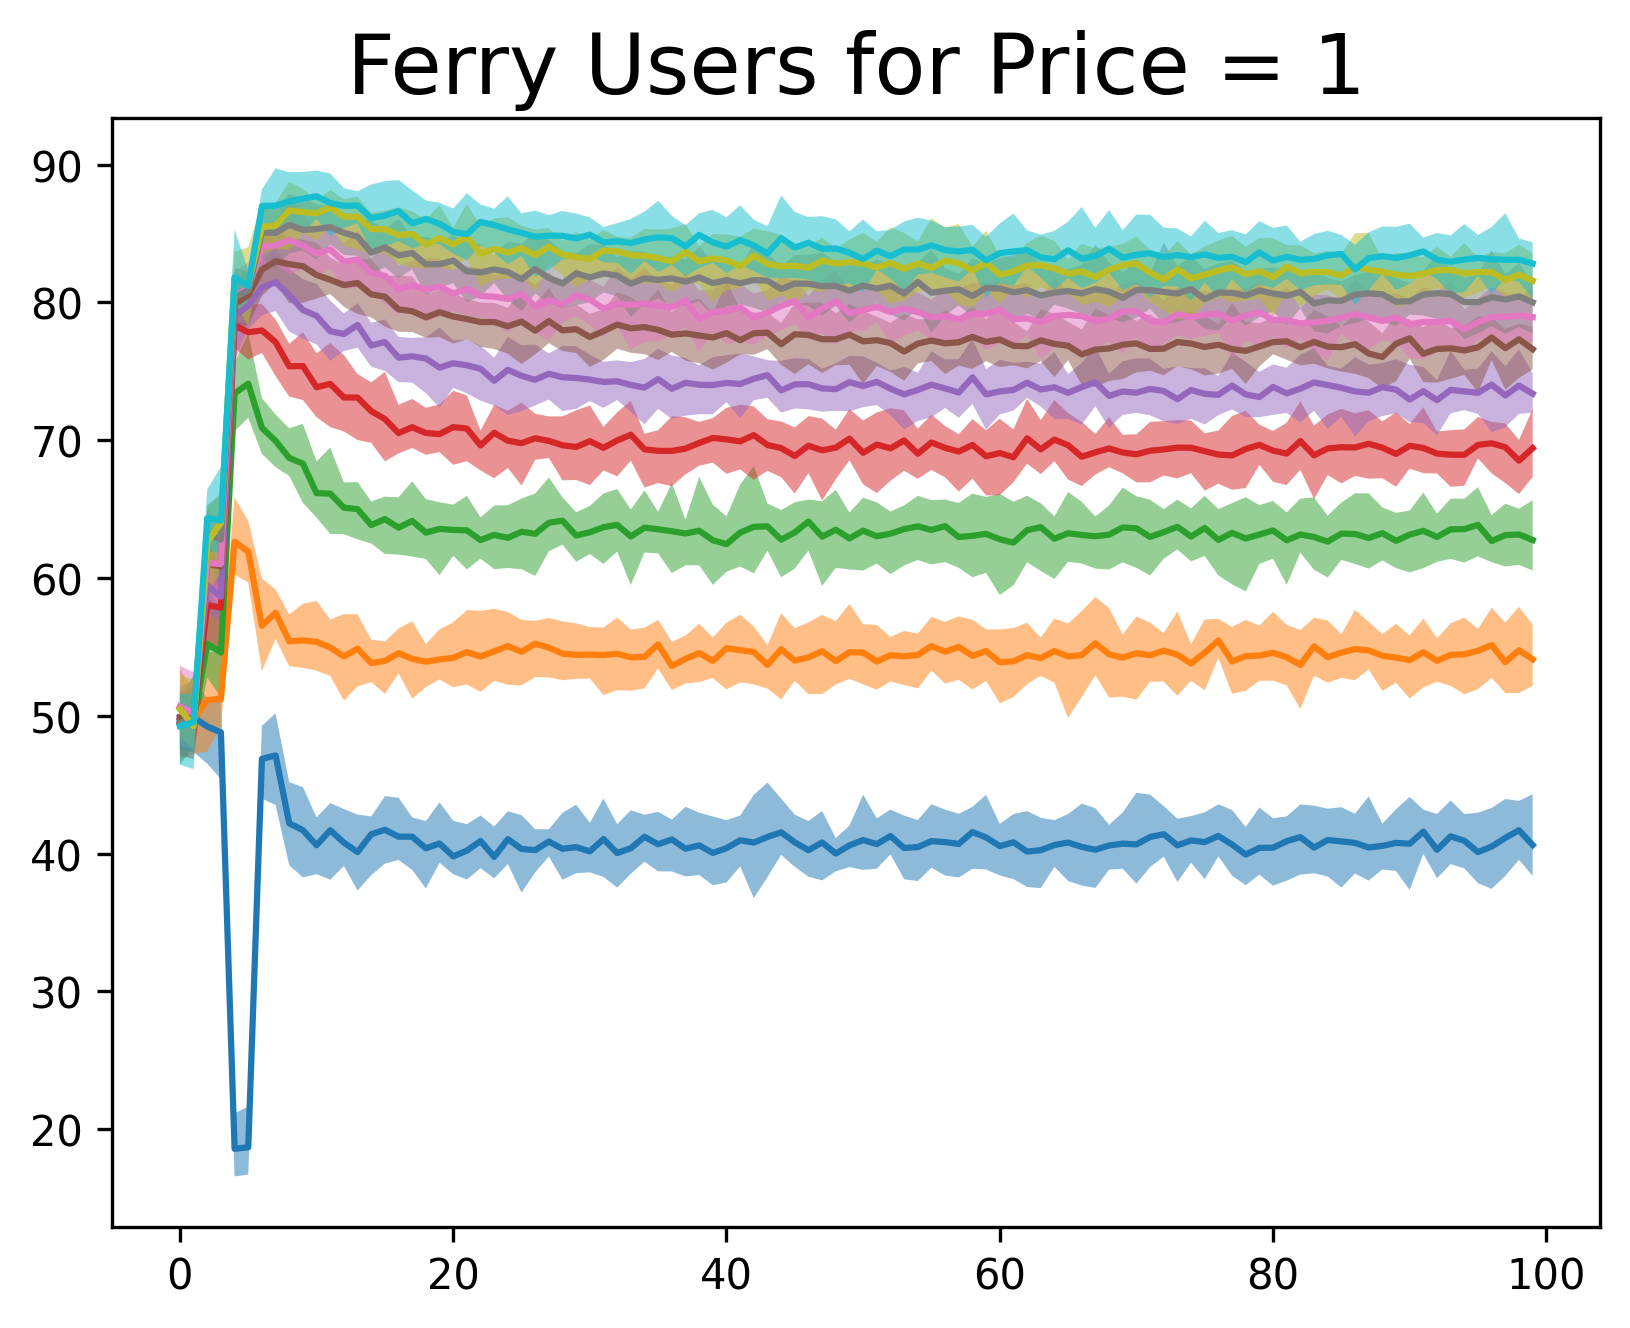

In [6]:
for price_ix, ferry_base_price in enumerate(prices):
    plt.figure(dpi=300)
    for capacity_ix, capacity in enumerate(capacities):
        plt.plot(mean[capacity_ix, price_ix]*100, label=capacity)
        plt.fill_between(np.arange(0, num_days, 1), CI[capacity_ix, price_ix, :, 0]*100, CI[capacity_ix, price_ix, :, 1]*100, alpha=0.5)
    plt.title(f'Ferry Users for Price = {ferry_base_price}', fontsize=20, fontwight='bold')
    plt.legend()
    plt.xlabel('Time [a.u.]', fontsize=14, fontwight='bold')
    plt.ylabel('Ferry Users (%)', fontsize=14, fontwight='bold')
    plt.savefig(f'Figures/Percentage of ferry users in time for price = {ferry_base_price}')
    plt.show()

In [ ]:
for capacity_ix, capacity in enumerate(capacities):
    plt.figure(dpi=300)
    for price_ix, ferry_base_price in enumerate(prices):
        plt.plot(mean[capacity_ix, price_ix]*100, label=ferry_base_price)
        plt.fill_between(np.arange(0, num_days, 1), CI[capacity_ix, price_ix, :, 0]*100, CI[capacity_ix, price_ix, :, 1]*100, alpha=0.5)
    plt.title(f'Ferry Users for Capacity = {capacity}', fontsize=20, fontwight='bold')
    plt.legend()
    plt.xlabel('Time [a.u.]', fontsize=14, fontwight='bold')
    plt.ylabel('Ferry Users (%)', fontsize=14, fontwight='bold')
    plt.savefig(f'Figures/Percentage of ferry users in time for capacity = {capacity}')
    plt.show()

In [ ]:
plt.figure(dpi=300)
capacity_ix = 4
plt.plot(prices, mean_mean[capacity_ix, :]*100)
plt.fill_between(prices, CI_mean[capacity_ix, :, 0], CI_mean[capacity_ix, :, 1], alpha=0.5)
plt.title('Ferry users against price for capacity = 1000', fontsize=20, fontwight='bold')
plt.xlabel('Prices [a.u.]', fontsize=14, fontwight='bold')
plt.ylabel('Ferry Users (%)', fontsize=14, fontwight='bold')
plt.savefig('Figures/Ferry users agains price for capacity = 1000')
plt.show()

In [ ]:
plt.figure(dpi=300)
price_ix = 4
plt.plot(capacities, mean_mean[:, price_ix]*100)
plt.fill_between(capacities, CI_mean[:, price_ix, 0]*100, CI_mean[:, price_ix, 1]*100, alpha=0.5)
plt.title('Ferry users agains capacity for price = 5', fontsize=20, fontwight='bold')
plt.xlabel('Capacities', fontsize=14, fontwight='bold')
plt.ylabel('Ferry users (%)', fontsize=14, fontwight='bold')
plt.savefig('Figures/Ferry users agains capacity for price = 5')
plt.show() 

In [ ]:
%matplotlib

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for capacities and prices
X, Y = np.meshgrid(capacities, prices)
Z = mean_mean.T  # Transpose to match the meshgrid dimensions

# Plot the surface
surf = ax.plot_surface(X, Y, Z*100, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_xlabel('Capacity', fontsize=14, fontweight='bold')
ax.set_ylabel('Price [a.u.]', fontsize=14, fontweight='bold')
ax.set_zlabel('Mean Ferry Users (%)', fontsize=14, fontweight='bold')
ax.set_title('Influence of Pricing and Capacity Policies on Ferry Usage', fontsize=20, fontweight='bold')


# Add a color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.savefig('Figures/3D Surface Plot of Mean Percentage of Ferry Users')
plt.show()